In [1]:
#multiple decission trees = random forst
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
os.chdir('<filepath>')

In [5]:
df1 = pd.read_csv('Position Salary .csv')
print(df1)

            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [6]:
x = df1.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
y = df1.iloc[:,2].values
print(y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


In [12]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x,y) #max number of decission trees get created, max = 100

RandomForestRegressor()

In [13]:
y_pred = rf.predict(x)
print(y_pred)

[ 49500.  51300.  60450. 103400. 131000. 128000. 108950.  94650.  93050.
  89100.]


In [14]:
accuracy = r2_score(y,y_pred)
print(accuracy)

0.9476778036778036


In [16]:
result = pd.concat([df1, pd.DataFrame(y_pred, columns = ['Prediction'])], axis = 1)
result['Difference'] = result['Salary'] - result['Prediction']
print(result)

            Position  Level  Salary  Prediction  Difference
0   Busienss Analyst      1   45000     49500.0     -4500.0
1  Junior Consultant      2   50000     51300.0     -1300.0
2  Senior Consultant      3   60000     60450.0      -450.0
3            Manager      4  120000    103400.0     16600.0
4    Country Manager      5  140000    131000.0      9000.0
5     Region Manager      6  130000    128000.0      2000.0
6            Partnor      7  100000    108950.0     -8950.0
7     Senior Partnor      8   90000     94650.0     -4650.0
8            C Level      9   95000     93050.0      1950.0
9               CEO      10   85000     89100.0     -4100.0


/var/folders/w1/c2vvrx9d61j9dv7jwtkkdg900000gn/T/ipykernel_6944/48050237.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


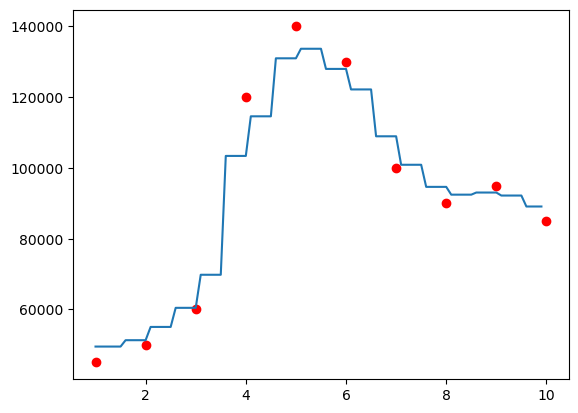

In [17]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()

In [24]:
rf.predict([[3],[3.4],[3.8],[4.2]])

array([ 60450.,  69800., 103400., 114600.])